In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation,FFMpegFileWriter
from HANDY import Model as HANDY
from scipy.integrate import odeint
%matplotlib inline
from IPython.display import HTML

fname = "params_stable_equitable_2.txt"
model = HANDY(fname=fname) #fichier trouvé

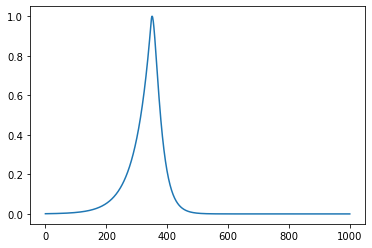

In [16]:
#x = np.reshape(np.arange(0,1000), (1,1000))
#print("size x", np.size(x))
x = [i for i in range(1000)]
XC = model.run_auto(norm=True)

plt.plot(x,XC)
plt.show()

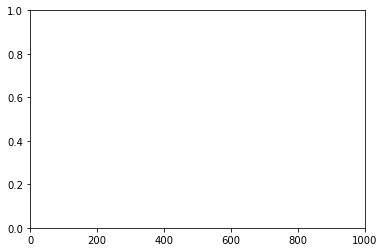

In [17]:
# Création de la figure et de l'axe

fig, ax = plt.subplots()

# Création de la ligne qui sera mise à jour au fur et à mesure
line, = ax.plot([],[], color='blue')
# point, = ax.plot([], [], ls="none", marker="o")

#Gestion des limites de la fenêtre
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1)


# Création de la function qui sera appelée à "chaque nouvelle image"
def animate(k):
    i = min(k, len(x))
    line.set_data(x[:i], XC[:i])

    return line,

# Génération de l'animation, frames précise les arguments numérique reçus par func (ici animate), 
# interval est la durée d'une image en ms, blit gère la mise à jour
ani = FuncAnimation(fig=fig, func=animate, frames=range(len(x)), interval=50, blit=True)


In [27]:
from IPython.display import HTML
#plt.rcParams["animation.writer"] = 'mencoder'


In [28]:
HTML(ani.to_html5_video())

RuntimeError: Requested MovieWriter (mencoder) not available